In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Spotify - Popularity Classification 
### All Time Top 2000s Mega Dataset


TABLE OF CONTENT

0. INTRODUCTION & PROJECT GOAL
1. IMPORTING LIBRARIES
2. DATA DESCRIPTION & CLEANING
3. EXPLORATORY ANALYSIS & VISUALISATIONS
4. MODELLING DATA
5. FINAL CONCLUSIONS

### 0 INTRODUCTION

#### Data Collection:

This Dataset was collected from Kaggle.com

- Link: https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset

#### Context

- This dataset contains audio statistics of roughly the top 2000 tracks from between 1956 to 2019 on Spotify. The data contains 15 columns each describing the track and it's qualities. 

#### Acknowledgements

This data is extracted from the Spotify playlist - Top 2000s on PlaylistMachinery(@plamere) using Selenium with Python. More specifically, it was scraped from http://sortyourmusic.playlistmachinery.com/. 

#### Content Variables

1. Index: ID
2. Title: Name of the Track
3. Artist: Name of the Artist
4. Top Genre: Genre of the track
5. Year: Release Year of the track
6. Beats per Minute(BPM): The tempo of the song
7. Energy: The energy of a song - the higher the value, the more energtic. song
8. Danceability: The higher the value, the easier it is to dance to this song.
9. Loudness: The higher the value, the louder the song.
10. Valence: The higher the value, the more positive mood for the song.
11. Length: The duration of the song.
12. Acoustic: The higher the value the more acoustic the song is.
13. Speechiness: The higher the value the more spoken words the song contains
15. Popularity: The higher the value the more popular the song is.

# PROJECT GOAL & INTERESTS:

1. The goal is to build a classification models using: **Linear Regression, Decision Tree Classifier & Naive Bayes.**
- Will look to classify a songs level of popularity based off of given feature metrics as mention above.

Along the way we will look at other interests such as:

2. Most popular Genres and Artists of all time from 1950s to 2000s?
3. Is there a trend in genres preferred back in the day vs now?
4. What other variables have an impact on the popularity metric? 

# 1 IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from scipy import stats, special

import seaborn as sns
from seaborn import pairplot, heatmap
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

from sklearn import model_selection, metrics, linear_model, tree, datasets, feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler

# 2 DATA DESCRIPTION & CLEANING

#### 2.1 DATA DESCRIPTION

In [3]:
# Loading datadataset & View

spotify_df = pd.read_csv('data/Spotify-2000.csv') 
spotify_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
# Overview of Dataset information and data types

spotify_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [5]:
# Overview of Dataset numerical data

spotify_df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [6]:
# Number of genres that have featured in the all time top 2000.

len(spotify_df["Top Genre"].unique())

149

In [7]:
# Number of times each genre features in the all time top 2000.

spotify_df["Top Genre"].value_counts()

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

### Raw Dataset  Summary:

#### The Dataset contains:
- 1994 entries
- 1994 non-null entries
- 15 total variable columns
- 149 Genre entries

#### Data Types:
- 4 categorical columns
- 11 numerical columns

#### Numerical Data:
- The data set is between years 1994 - 2019. Just about 63 years worth of most popular songs as classified by spotify.
- min Popularity of a song is 11 and max is 100.


### Initial Analysis & Progression:

1. It's clear that Rock music seems to be the all time favourite genre with the most features. But that being said the data is lob-sidded towards pre-2000s and music taste does tend to change over the years so this can be be investigated further in the EDA.

### 2.2 Data Cleaning

#### Action:

1. Convert column data types.
2. Remove unecessary columns. 
3. Adjust column titles.
4. consolidate genre column as there are many variations of a single genre e.g. 'dutch pop' and 'dance pop' or 'album rock'and alternative rock. we will make these columns just 'pop' or just 'rock' as to provide a more accurate summarised representation of that genres.

In [8]:
#Converting Length (Duration) to an integer data type

spotify_df.replace(',','', regex=True, inplace=True)
spotify_df['Length (Duration)']= spotify_df['Length (Duration)'].apply(pd.to_numeric,errors='coerce')
print('Length (Duration) is now a -->',spotify_df['Length (Duration)'].dtype, 'data type')

Length (Duration) is now a --> int64 data type


In [9]:
#Removing the Index column.
spotify_df.drop(columns = ['Index'], inplace = True)

#Converting all column titles to lowercase.
spotify_df.columns = map(str.lower, spotify_df.columns)

#Coverting column names to have no space between, if they do, replace space with an underscore "_"
spotify_df.rename(columns = {'top genre' : 'genre', 'beats per minute (bpm)':'beats_per_minute','loudness (db)': 'loudness','length (duration)': 'duration'}, inplace = True)

In [10]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             1994 non-null   object
 1   artist            1994 non-null   object
 2   genre             1994 non-null   object
 3   year              1994 non-null   int64 
 4   beats_per_minute  1994 non-null   int64 
 5   energy            1994 non-null   int64 
 6   danceability      1994 non-null   int64 
 7   loudness          1994 non-null   int64 
 8   liveness          1994 non-null   int64 
 9   valence           1994 non-null   int64 
 10  duration          1994 non-null   int64 
 11  acousticness      1994 non-null   int64 
 12  speechiness       1994 non-null   int64 
 13  popularity        1994 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 218.2+ KB


In [11]:
spotify_df.head(3)

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69


### Consolidating genre column

In [12]:
# function to split the genre column
    
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
    return result.str.join('')

#loop until the genre cannot be split any further

new_genre = spotify_df['genre'].copy()
while(max((new_genre.str.split(" ", 1)).str.len()) > 1):
    new_genre = genre_splitter(new_genre)
    
print('New Total of Genres from 146 to -->', len(new_genre.unique()))

New Total of Genres from 146 to --> 68


In [13]:
new_genre.value_counts()

rock           856
pop            333
standards      123
metal           93
indie           77
              ... 
laboratorio      1
holler           1
hardcore         1
trance           1
bebop            1
Name: genre, Length: 68, dtype: int64

### Analysis:
- Above shows consolidated genre column into single/more generalistic genres into rock, pop etc.
- There is also an expected increase in values due to the consolidating the genres.

In [14]:
#inputting new column values from new_genre to genre in dataframe.

spotify_df['genre'] = new_genre
spotify_df['genre']

0       standards
1            rock
2             hop
3           metal
4            rock
          ...    
1989    standards
1990    standards
1991         rock
1992        bebop
1993    standards
Name: genre, Length: 1994, dtype: object

# 3 EXPLORATORY ANALYSIS & VISUALISATIONS


-  In this section we will investigate the data. Taking a particular look at our target features: "Popularity" & "Genre" and their correlating variables within the data set.

### 3.1 Most popular Genres & Artists from 1950s to 2000s?

In [15]:
# Create a function top_10, which takes a single parameter for a column. 
# Group the data by the desired column input, sum the values the remaining columns, sort sum values by 'Popularity' column 
# from highest to lowest, the print the top 10 rows. 

def top_10(column):
    top_10_songs = spotify_df.groupby([column]).sum().sort_values('popularity', ascending=False).head(10)
    return(top_10_songs[['popularity']])  # Only show 'popularity' column.

top_10('genre')

,popularity
genre,
rock,52025
pop,19390
standards,7697
metal,6141
soul,3032
indie,2912
wave,2571
invasion,2451
cabaret,2349


In [16]:
#Use the same function for the Artists

top_10('artist')

,popularity
artist,
The Beatles,2451
Queen,2085
Coldplay,1888
Michael Jackson,1511
The Rolling Stones,1496
U2,1476
Bruce Springsteen,1378
David Bowie,1311
ABBA,1186


#### 3.1 Conclusion:

- The above shows the accumulation of most popular Genres & Artists of all time. We can also see there is a significant amount of Rock music genre entries compared to the rest of the genres. So there was always a high possibility this will be the most popular overall. Though Michael Jackson, would be an outlier here due to his popularity. 

- But in terms of 'pure' popularity as seen below, values from 0-100, the story is a little different. We can see that pop music and its many variations has a majority in populularity in more recent years. This may indicate a shift in popularity over the years as well as musical listening trends due to advancements in technology.

In [17]:
pure_popularity = spotify_df.sort_values('popularity', ascending=False).head(10)
pure_popularity[['genre', 'year', 'popularity']]

,genre,year,popularity
793,pop,2019,100
787,pop,2019,98
786,electropop,2019,95
1641,pop,1994,95
688,rock,2017,88
726,pop,2018,88
683,pop,2017,87
687,pop,2017,87
745,pop,2018,87
529,mellow,2013,86


## 3.2  Is there a trend/shift in genres prefered to pre-2000s vs now over the years?

#### - To approach this, I will **split the dataset into quarters (n/4) and track the popularity change** in genre, as well as the genre entry count over the years. 

In [18]:
# Split of 'Year' column data into 4x equal-dispersed buckets in ascending order from 1956 - 2019:

spotify_df['year'] = pd.qcut(spotify_df['year'], q=4, labels=[1, 2, 3, 4]) 
spotify_df['year'].value_counts()

1    520
3    500
4    496
2    478
Name: year, dtype: int64

[Text(0.5, 0, 'Year Block (YB) divided into 4/4'), Text(0, 0.5, 'Year Count')]

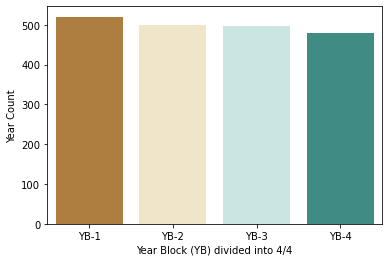

In [19]:
x=['YB-1', 'YB-2', 'YB-3', 'YB-4']
y=spotify_df['year'].value_counts()

_ = sns.barplot(x=x, y=y, palette="BrBG")
_.set(xlabel='Year Block (YB) divided into 4/4', ylabel='Year Count')

In [20]:
# Function for creating year block sets (1 - 4):

def year_block(year_no):
    block = spotify_df.loc[spotify_df['year'] == year_no]
    return block[['genre', 'year', 'popularity']].sort_values('popularity', ascending=False)

# Function for creating Top 5 genre value counts for Pie Chart visual:

def genre_count(year_block):
    return year_block['genre'].value_counts().head()

## Pie Chart Visuals of Year Blocks showing trend/shift in genres between (1956 - 2019)

In [21]:
#Creation of Year block 1 & Genre counter for Pie Chart Viaual:
year_block_1 = year_block(1) 
genre_count(year_block_1)
   
#Pie chart for year block 1:
values = genre_count(year_block_1).values
names = genre_count(year_block_1).index
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'AntiqueWhite']

fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text='Year Block 1')
fig.show()
   
    
#Creation of Year block 2 & Genre counter for Pie Chart Viaual:
year_block_2 = year_block(2) 
genre_count(year_block_2)
   
#Pie chart for year block 2:
values = genre_count(year_block_2).values
names = genre_count(year_block_2).index
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'AntiqueWhite']

fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text='Year Block 2')
fig.show()


#Creation of Year block 3 & Genre counter for Pie Chart Viaual:
year_block_3 = year_block(3) 
genre_count(year_block_3)
   
#Pie chart for year block 3:
values = genre_count(year_block_3).values
names = genre_count(year_block_3).index
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'AntiqueWhite']

fig = go.Figure(data=[go.Pie(labels=names, values=values, name="Year Block 3", pull=[0.1, 0, 0, 0, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text='Year Block 3')
fig.show()


#Creation of Year block 4 & Genre counter for Pie Chart Viaual:
year_block_4 = year_block(4) 
genre_count(year_block_4)
   
#Pie chart for year block 4:
values = genre_count(year_block_4).values
names = genre_count(year_block_4).index
colors = ['mediumturquoise','gold', 'darkorange', 'lightgreen', 'AntiqueWhite']

fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text='Year Block 4')
fig.show()

#### 3.2 Conclusion: Pie Chart Analysis:
- As per above, we can clearly see a shift in genre preference, from Rock leaning into pop music at the end of the quater 4/4. But, the level of popularity for pop music has a much higher rate than that of rock music at it's peak as we shall see below.

## Genre Popularity Count over the years

In [22]:
# Joining the year_block heads for top genre count:

frames = [year_block_1.head(), year_block_2.head(), year_block_3.head(), year_block_4.head()]
top_genre_df = pd.concat(frames)
top_genre_df

,genre,year,popularity
1113,rock,1,83
943,rock,1,82
999,rock,1,82
884,rock,1,82
1947,invasion,1,82
1237,rock,2,84
1204,rock,2,84
1157,rock,2,83
1452,punk,2,83
1315,rock,2,83


## 3.3 What other features have an impact on the popularity of a song?

- We shall look to explore numerical variables such as the audio features and look for correlation bewteen each feature in order to help define usable features to build an accurate model. First let's remove the 'title' and 'year column as all values are unique and will not help with our classification model.

In [23]:
spotify_df.drop(columns = ['title','year'], inplace = True)
spotify_df.head()

,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Norah Jones,standards,157,30,53,-14,11,68,201,94,3,71
1,Deep Purple,rock,135,79,50,-11,17,81,207,17,7,39
2,Gorillaz,hop,168,69,66,-9,7,52,341,2,17,69
3,Foo Fighters,metal,173,96,43,-4,3,37,269,0,4,76
4,Bruce Springsteen,rock,106,82,58,-5,10,87,256,1,3,59


#### Note:
- Music genres that have a single values would make our model inefficient, since it does not have enough data to work off of, so these values and corresponding rows in the original dataframe will be removed. Therefore: 

#### - Genre's with a value count less than 20x shall be removed

In [24]:
unique = spotify_df['genre'].unique()
to_remove = [] 

# genres that have a single instance only will be placed within the to_remove array
for genre in unique:
    if spotify_df['genre'].value_counts()[genre] < 20: 
        to_remove += [genre]

print('Genre Values to be removed from data set =', len(to_remove))

Genre Values to be removed from data set = 56


#### - Now to replace our original genre column with the updated version

In [25]:
spotify_df.set_index(["genre"],drop = False, inplace = True)
for name in to_remove:
    type(name)
    spotify_df.drop(index = str(name), inplace = True)
    
spotify_df.head()

,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
genre,,,,,,,,,,,,
standards,Norah Jones,standards,157,30,53,-14,11,68,201,94,3,71
rock,Deep Purple,rock,135,79,50,-11,17,81,207,17,7,39
hop,Gorillaz,hop,168,69,66,-9,7,52,341,2,17,69
metal,Foo Fighters,metal,173,96,43,-4,3,37,269,0,4,76
rock,Bruce Springsteen,rock,106,82,58,-5,10,87,256,1,3,59


In [26]:
spotify_df = spotify_df.reset_index(drop=True)
spotify_df.head()

,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Norah Jones,standards,157,30,53,-14,11,68,201,94,3,71
1,Deep Purple,rock,135,79,50,-11,17,81,207,17,7,39
2,Gorillaz,hop,168,69,66,-9,7,52,341,2,17,69
3,Foo Fighters,metal,173,96,43,-4,3,37,269,0,4,76
4,Bruce Springsteen,rock,106,82,58,-5,10,87,256,1,3,59


#### - As you can see genre's have been removed with those having an instance less than 20.

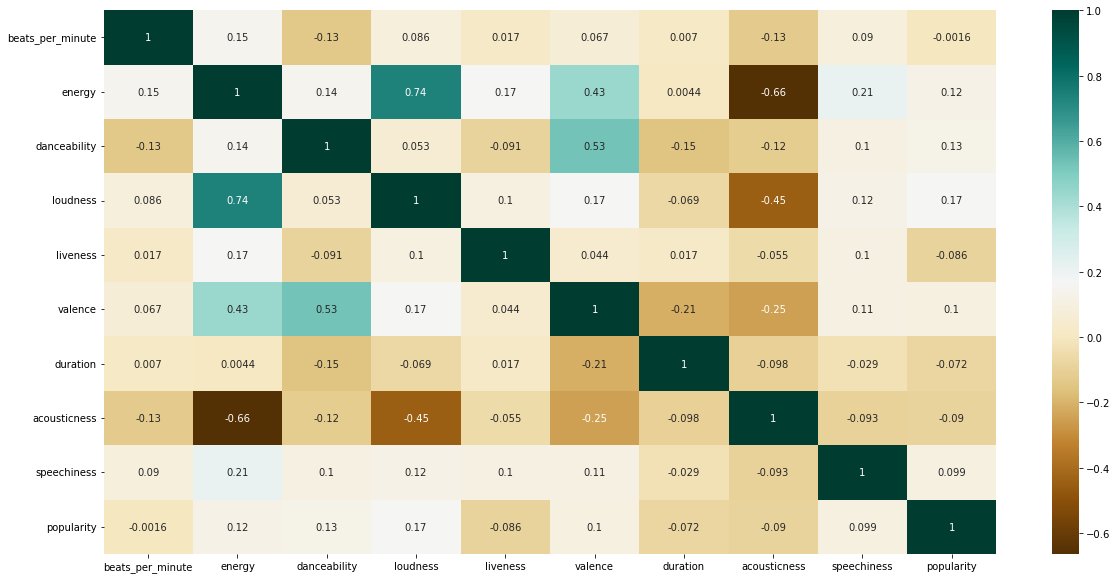

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(spotify_df.corr(),annot=True,cmap='BrBG')
plt.show()

### 3.3 Conclusion:

#### Target Feature: 'Popularity'
From the above heat map, though not very dtrong, we can see that the strongest features that correlate with Popularity is:
- loudness (17%)
- danceability (13%)
- energy (12%)
- valence (10%)

#### Variable relationships: 
We can see the strongest relationship between the variables excl. paopularity are:
- loudness & energy (74%)
- valence & danceability (53%)
- valence & energy (43%)

# 4 MODELLING DATA

# --> Model (Popularity Classification)

**Popularity predictor Model:** Will look to classify a songs level of popularity based off of given feature metrics as mention above.

**Steps:**
1. We need to one hot-encode (get dummy variables) for the genre, artist & popularity feature for higher accuracy.
2. Split & Scale Data
3. Modele & Train Data

### Step 1: One hot-encode Genre & Artist Features:

#### - Create dummy variables for the genre column.

In [28]:
# Function for creating dummy variables

def dummies(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

spotify_df = dummies(spotify_df, 'genre', 'genre')
spotify_df = dummies(spotify_df, 'artist', 'artist')
spotify_df.head()

,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity,...,artist_Within Temptation,artist_Wolfmother,artist_Xavier Rudd,artist_Yann Tiersen,artist_Yes,artist_Youp van 't Hek,artist_Yusuf / Cat Stevens,artist_ZZ Top,artist_Zucchero,artist_a-ha
0,157,30,53,-14,11,68,201,94,3,71,...,0,0,0,0,0,0,0,0,0,0
1,135,79,50,-11,17,81,207,17,7,39,...,0,0,0,0,0,0,0,0,0,0
2,168,69,66,-9,7,52,341,2,17,69,...,0,0,0,0,0,0,0,0,0,0
3,173,96,43,-4,3,37,269,0,4,76,...,0,0,0,0,0,0,0,0,0,0
4,106,82,58,-5,10,87,256,1,3,59,...,0,0,0,0,0,0,0,0,0,0


#### - Classify target feature: 'popularity' into 2x bins, to help better classify our data for our predictive modeling.

- 1 = 'most popular' 
- 0 = 'least popular'  

In [29]:
spotify_df['popularity'] = pd.qcut(spotify_df['popularity'], q=2, labels=[0, 1]) 
spotify_df[['popularity']].head()

,popularity
0,1
1,0
2,1
3,1
4,0


In [30]:
target_v = spotify_df['popularity'].value_counts(normalize=True).round(3)
target_v

0    0.514
1    0.486
Name: popularity, dtype: float64

<AxesSubplot:ylabel='popularity'>

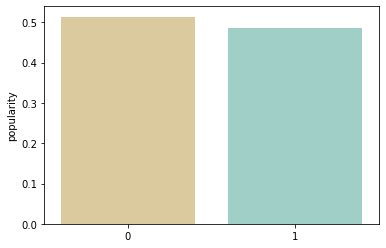

In [31]:
sns.barplot(x=target_v.index, y=target_v, palette="BrBG")

### Analysis

- As we see above, we have a very good split for our target variable. This will greatly minimise class imbalance and will allow our model to be more accurate.

### Step 2: Splitting & Scaling Data

In [32]:
# Chosing independant and dependant variables:

y = spotify_df.loc[:,'popularity'] #dependant 
X = spotify_df[['loudness', 'danceability', 'energy', 'valence']] #independant 

# Split data into training and test sets: 80% training, 20% test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [33]:
print('Shape of Data:')
print('-')
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape,'y_test:', y_test.shape)

Shape of Data:
-
X_train: (1382, 4) y_train: (1382,)
X_test: (346, 4) y_test: (346,)


In [34]:
# Scale the independant variable for relatively normal distribution of the data. 

X_train = StandardScaler().fit_transform(X_train)

## Modeling & Training

Due to the nature of the dataset, we will be implementing classification type machine learning with the following:
- Logistic Regression
- Decision Tree Classifier
- Naive Bayes 

## Training Model Accuracy Outputs:

In [35]:
# Creating Models

logr_model = linear_model.LogisticRegression(solver='liblinear')
dtree_model = tree.DecisionTreeClassifier()
nb_model = GaussianNB()

# Training the models

logr_model.fit(X_train, y_train)
dtree_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Accuracy of trained models with training data:

logr_train_acc = logr_model.score(X_train, y_train)
dtree_train_acc = dtree_model.score(X_train, y_train)
nb_train_acc = nb_model.score(X_train, y_train)

print('Training Model Accuracy Outputs:')
print('-')
print('Logistic Regression:', round(logr_train_acc*100,2),'%')
print('Decision Tree:', round(dtree_train_acc*100,2),'%')
print('Naive Bayes:', round(nb_train_acc*100,2),'%')

Training Model Accuracy Outputs:
-
Logistic Regression: 56.8 %
Decision Tree: 99.93 %
Naive Bayes: 55.64 %


In [36]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[logr_train_acc, dtree_train_acc, nb_train_acc], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Accuracy of trained models with training data')
fig.show()

### Analysis:
- As seen above it appears that the Decision Tree Model has a really high accuracy rate against the training data. But this seems a bit too high and I suspect over fitting. I will validate this through k-fold cross validation.

## Validating models with k-fold cross validation:

In [37]:
# Validating models with k-fold cross validation method

kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=24)

accuracy_logr = cross_val_score(logr_model, X_train, y_train, scoring="accuracy", cv=kf)
accuracy_dtree = cross_val_score(dtree_model, X_train, y_train, scoring="accuracy", cv=kf)
accuracy_nb = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=kf)

accuracy_logr = accuracy_logr.mean()
accuracy_dtree = accuracy_dtree.mean()
accuracy_nb = accuracy_nb.mean()

print('k-fold Cross Validation Accuracy Outputs:')
print('-')
print("Logistic Regression:", round(accuracy_logr*100,2),"%")
print("Decision Tree:", round(accuracy_dtree*100,2),"%")
print("Naive Bayes:", round(accuracy_nb*100,2),"%")

k-fold Cross Validation Accuracy Outputs:
-
Logistic Regression: 56.67 %
Decision Tree: 53.84 %
Naive Bayes: 55.65 %


In [38]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[accuracy_logr, accuracy_dtree, accuracy_nb], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Validating models with k-fold cross validation')
fig.show()

### Analysis:
- As seen above this seems a little more accurate with the best accuracy being the Logistic Regression Model. It would appear that with a larger dataset the Decision Tree performs well but when there is minimal data, not so much. 

## Test Data Output from trained models:

In [39]:
# using the test data for our trained models:

print('Test data - Model Accuracy Outputs:')
print('-')
print('Logistic Regression:', round(logr_model.score(X_test, y_test)*100,2),'%')
print('Decision Tree:', round(dtree_model.score(X_test, y_test)*100,2),'%')
print('Naive Bayes:', round(nb_model.score(X_test, y_test)*100,2),'%')

Test data - Model Accuracy Outputs:
-
Logistic Regression: 53.47 %
Decision Tree: 53.47 %
Naive Bayes: 53.18 %


### Analysis and Next Steps:
- With the test data, we have an identical match with Logistic Regression and Decision Tree.
- Accuracy ratings are very low.
- I will look to now include all variables as to help improve the accuracy of the models.

# --> Model (Popularity Classification) Pt.2 

- Using all independant variables to try and achieve a greater accuracy

### Splitting & Scaling Data.2

In [40]:
# Chosing independant and dependant variables:

y_1 = spotify_df.loc[:,'popularity'] #dependant/target 
X_1 = spotify_df.drop('popularity', axis=1)#independant 

# Split data into training and test sets: 80% training, 20% test split.

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=20)

In [41]:
print('Shape of Data.2:')
print('-')
print('X_train_1:', X_train_1.shape, 'y_train_1:', y_train_1.shape)
print('X_test_1:',X_test_1.shape,'y_test_1:', y_test_1.shape)

Shape of Data.2:
-
X_train_1: (1382, 603) y_train_1: (1382,)
X_test_1: (346, 603) y_test_1: (346,)


In [42]:
# Scale the independant variable for relatively normal distribution of the data. 

X_train_1 = StandardScaler().fit_transform(X_train_1)

## Modeling & Training.2

- Same a previosuly done with the 3x classification models.

#### Training Model Accuracy Outputs.2

In [43]:
# Creating Models

logr_model_1 = linear_model.LogisticRegression(solver='liblinear')
dtree_model_1 = tree.DecisionTreeClassifier()
nb_model_1 = GaussianNB()

# Training the models

logr_model_1.fit(X_train_1, y_train_1)
dtree_model_1.fit(X_train_1, y_train_1)
nb_model_1.fit(X_train_1, y_train_1)

# Accuracy of trained models with training data:

logr_train_acc_1 = logr_model_1.score(X_train_1, y_train_1)
dtree_train_acc_1 = dtree_model_1.score(X_train_1, y_train_1)
nb_train_acc_1 = nb_model_1.score(X_train_1, y_train_1)

print('Training Model Accuracy Outputs.2:')
print('-')
print('Logistic Regression:', round(logr_train_acc_1*100,2),'%')
print('Decision Tree:', round(dtree_train_acc_1*100,2),'%')
print('Naive Bayes:', round(nb_train_acc_1*100,2),'%')

Training Model Accuracy Outputs.2:
-
Logistic Regression: 85.53 %
Decision Tree: 100.0 %
Naive Bayes: 77.71 %


In [44]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[logr_train_acc_1, dtree_train_acc_1, nb_train_acc_1], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Accuracy of trained models with tusing all independant variables on training data')
fig.show()

### Analysis:
- As seen above it appears that the accuracy has increased quite a bit for all models, again, Decision Tree Model has a really high accuracy rate against the training data. So will validate this through k-fold cross validation.

#### Validating models with k-fold cross validation.2

In [45]:
# Validating new models with k-fold cross validation method

accuracy_logr_1 = cross_val_score(logr_model_1, X_train_1, y_train_1, scoring="accuracy", cv=kf)
accuracy_dtree_1 = cross_val_score(dtree_model_1, X_train_1, y_train_1, scoring="accuracy", cv=kf)
accuracy_nb_1 = cross_val_score(nb_model_1, X_train_1, y_train_1, scoring="accuracy", cv=kf)

accuracy_logr_1 = accuracy_logr_1.mean()
accuracy_dtree_1 = accuracy_dtree_1.mean()
accuracy_nb_1 = accuracy_nb_1.mean()

print('k-fold Cross Validation Accuracy Outputs.2:')
print('-')
print("Logistic Regression:", round(accuracy_logr_1*100,2),"%")
print("Decision Tree:", round(accuracy_dtree_1*100,2),"%")
print("Naive Bayes:", round(accuracy_nb_1*100,2),"%")

k-fold Cross Validation Accuracy Outputs.2:
-
Logistic Regression: 69.46 %
Decision Tree: 60.48 %
Naive Bayes: 63.81 %


In [46]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[accuracy_logr_1, accuracy_dtree_1, accuracy_nb_1], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Validating new models with k-fold cross validation')
fig.show()

### Analysis:
- With the increase in data for the feature variables, we have increased validation of the models, with logistic regression coming out on top and decision trees coming in as least favourable.

#### Test Data Output from trained models.2

In [47]:
# using the test data for our trained models:

print('Test data - Model Accuracy Outputs.2:')
print('-')
print('Logistic Regression:', round(logr_model_1.score(X_test_1, y_test_1)*100,2))
print('Decision Tree:', round(dtree_model_1.score(X_test_1, y_test_1)*100,2))
print('Naive Bayes:', round(nb_model_1.score(X_test_1, y_test_1)*100,2))

Test data - Model Accuracy Outputs.2:
-
Logistic Regression: 55.49
Decision Tree: 53.47
Naive Bayes: 62.14


## Summary of Model Accuracy:

#### Model (Popularity Classification) 
- With 'loudness', 'danceability', 'energy', 'valence' as independant variables due to highest correlation.

Trained Model:
- LR Accuracy: 56%
- DT Accuracy: 99%
- NB Accuracy: 55%

K-fold Cross Val:
- LR Accuracy: 56%
- DT Accuracy: 54%
- NB Accuracy: 55%

Test Data Result:
- LR Accuracy: 53%
- DT Accuracy: 53%
- NB Accuracy: 53%


#### Model (Popularity Classification) pt.2
- With all independant data variables included.

Trained Model.2:
- LR Accuracy: 85%
- DT Accuracy: 100%
- NB Accuracy: 77%

K-fold Cross Val.2:
- LR Accuracy: 69%
- DT Accuracy: 62%
- NB Accuracy: 63%

Test Data Result.2:
- LR Accuracy: 55%
- DT Accuracy: 50%
- NB Accuracy: 62%

# 5 FINAL CONCLUSIONS

1. The accuracy of the data sets are quite vaired throughout the models used.
2. Overall, it seems the models perform better with more data than less. My assumption is this is due to the lack of strong correlation between what makes a song popular. As well as a shift in music trends over the years which makes prediction more challenging. In retrospect I could have split the modeling over the year blocks created. This may produce a more accurate model and relevant model.
3. In conclusion, the best performing in general, either the **Linear Regression** should be used with a larger dataset (+1000) with an 85% accuracy . And **Naive Bayes** models should be used with a smaller data set with a 62% accuracy.